## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df = combined_data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.duplicated(subset=['Mouse ID','Timepoint'])
df.duplicated

<bound method DataFrame.duplicated of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.8

In [7]:
df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.dropna(how='all')
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
df_clean.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary dataframe.
df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [30]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Using the aggregation method, produce the same summary statistics in a single line

df_clean.agg(
     {"Drug Regimen": ["min", "max", "median", "mean", "skew"],
           "Tumor Volume (mm3)": ["min", "max", "median", "mean", "skew"],
      }
      )
  

,Drug Regimen,Tumor Volume (mm3)
max,Zoniferol,78.567014
mean,NaN,50.448381
median,NaN,48.951474
min,Capomulin,22.050126
skew,NaN,0.298854


In [31]:
df_clean.isnull().values.any()

False

## Bar and Pie Charts

In [32]:
#Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites##

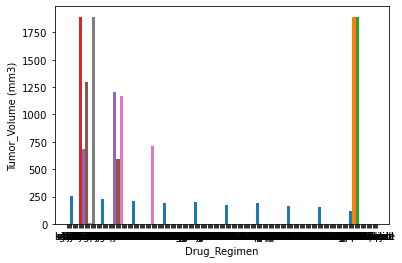

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.hist(df_clean)
plt.xlabel('Drug_Regimen')
plt.ylabel('Tumor_Volume (mm3)')
plt.show()

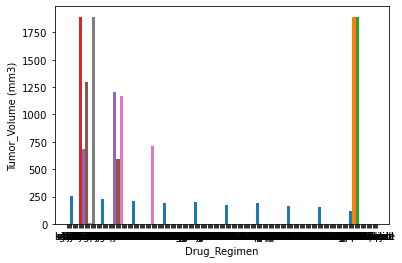

In [34]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(df_clean)
plt.xlabel('Drug_Regimen')
plt.ylabel('Tumor_Volume (mm3)')
plt.show()

In [35]:
import scipy.stats as stats
x = stats.norm.rvs(size = 100)
stats.normaltest(x)

NormaltestResult(statistic=0.15026835799124355, pvalue=0.9276190109905373)

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_clean.groupby("Sex").count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


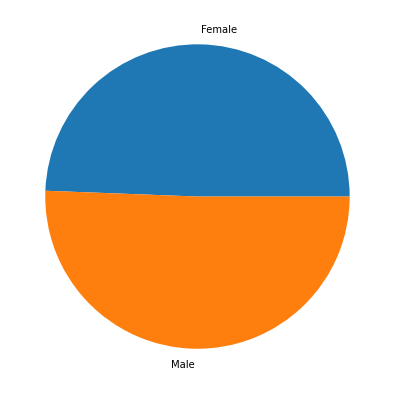

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
from matplotlib import pyplot as plt 
import numpy as np 

# Creating dataset 
Mouse_sex = ['Female', 'Male'] 
  
data = [935, 958] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = Mouse_sex) 
  
# show plot 
plt.show() 

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



In [60]:
df_clean.groupby("Tumor Volume (mm3)").count()['Drug Regimen']


Tumor Volume (mm3)
22.050126    1
23.343598    1
24.365505    1
25.472143    1
26.546993    1
            ..
75.113288    1
75.123690    1
75.294936    1
76.668817    1
78.567014    1
Name: Drug Regimen, Length: 1644, dtype: int64

In [40]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a scatter plot of year versus violent crime rate
Drug_Regimen = df_clean[:,6]
Tumor_volume = df_clean[:,7]
plt.scatter('Drug_regimen','Tumor Volume')
plt.xticks('Timepoint', rotation=90)

plt.show()

TypeError: '(slice(None, None, None), 6)' is an invalid key

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df = df_clean
Timepoint = df.iloc[:,3]
Tumor Volume (mm3) = df.iloc[:,7]
plt.scatter(Timepoint, Tumor_Volume_(mm3))
plt.xticks(Timepoint, rotation=90)
plt.xlabel('Timepoint')
plt.ylabel('Tumor_Volume_(mm3)')
plt.show()


SyntaxError: invalid syntax (<ipython-input-64-7ae24ecb2fbe>, line 4)

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
# Repeat plotting scatter and linear model for year versus aggravated assault
